In [1]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Machine Learning/Defect Detection/'
os.chdir(new_directory)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
classes = os.listdir(new_directory + '/Train')
classes

['ok', 'ng']

In [4]:
print("Training Data : ")
for f in classes:
    path = new_directory + '/Train/' + f
    print(f"{f} - {len(os.listdir(path))}")

Training Data : 
ok - 400
ng - 400


In [5]:
print("Testing Data : ")
for f in classes:
    path = new_directory + '/Test/' + f
    print(f"{f} - {len(os.listdir(path))}")

Testing Data : 
ok - 400
ng - 400


In [6]:
from keras.preprocessing import image

In [ ]:
train_data = []
train_labels = []

for category in classes:
    folder = new_directory + '/Train/'+category
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size= (80,150))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

train_labels

In [ ]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_labels

In [9]:
train_data.shape

(800, 80, 150, 3)

In [10]:
train_labels.shape

(800,)

In [11]:
train_data = train_data.reshape(len(train_data), -1)
train_data.shape

(800, 36000)

In [ ]:
category2label = {'ok':0,'ng':1}
label2category = {0:'ok',1:'ng'}
train_labels

In [13]:
train_labels = np.array([category2label[label] for label in train_labels])

In [14]:
train_labels.shape

(800,)

In [15]:
from keras.utils import to_categorical

In [16]:
train_labels = to_categorical(train_labels)

In [17]:
train_labels.shape

(800, 2)

In [18]:
train_labels[:2]

array([[1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
from keras.layers import Dense
from keras import Sequential

In [20]:
features = train_data.shape[1]

In [21]:
features

36000

In [22]:
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_shape = (features,)))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

custom_optimizer = Adam(learning_rate = 0.00005)
model.compile(optimizer = custom_optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4608128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4618530 (17.62 MB)
Trainable params: 4618530 (17.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(train_data, train_labels, batch_size = 32, epochs = 1000)

Epoch 1/1000
25/25 [==============================] - 5s 100ms/step - loss: 37.7470 - accuracy: 0.5213
Epoch 2/1000
25/25 [==============================] - 1s 59ms/step - loss: 8.3554 - accuracy: 0.6125
Epoch 3/1000
25/25 [==============================] - 1s 59ms/step - loss: 4.4678 - accuracy: 0.6825
Epoch 4/1000
25/25 [==============================] - 2s 61ms/step - loss: 10.1850 - accuracy: 0.6012
Epoch 5/1000
25/25 [==============================] - 2s 76ms/step - loss: 16.1965 - accuracy: 0.6062
Epoch 6/1000
25/25 [==============================] - 2s 77ms/step - loss: 11.9429 - accuracy: 0.6438
Epoch 7/1000
25/25 [==============================] - 2s 74ms/step - loss: 3.6632 - accuracy: 0.7462
Epoch 8/1000
25/25 [==============================] - 2s 60ms/step - loss: 4.0087 - accuracy: 0.7362
Epoch 9/1000
25/25 [==============================] - 1s 58ms/step - loss: 5.2659 - accuracy: 0.6963
Epoch 10/1000
25/25 [==============================] - 1s 58ms/step - loss: 5.7149 - a

In [ ]:
test_data = []
test_labels = []

for category in classes:
    folder = new_directory + '/Test/'+category
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size= (80,150))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)


In [27]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels.shape

(800,)

In [29]:
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(800, 2)

In [30]:
test_data = test_data.reshape(len(test_data), -1)
test_data.shape

(800, 36000)

In [31]:
model.evaluate(test_data, test_labels)

25/25 [==============================] - 1s 19ms/step - loss: 0.6043 - accuracy: 0.8900


[0.6042991876602173, 0.8899999856948853]

In [32]:
pred = model.predict(test_data).argmax(axis=1)

25/25 [==============================] - 0s 13ms/step


In [33]:
pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [35]:
def check_test():
    fig, axes = plt.subplots(40, 20, figsize=(30, 60))
    for i in range(40 * 20):
        if i >= 800:
            break

        category_index = i // 400
        category = classes[category_index]

        folder = os.path.join(new_directory, 'Test', category)
        img_name = os.listdir(folder)[i % 400]

        img_path = os.path.join(folder, img_name)

        img = image.load_img(img_path, target_size=(80,150))
        img = image.img_to_array(img)

        axes[i // 20, i % 20].imshow(img.astype('int'))
        img = img.reshape(1, 36000)
        pred = label2category[model.predict(img).argmax()]

        if pred == 'ok':
            axes[i // 20, i % 20].set_title('OK', fontsize=14, color='green')
        elif pred == 'ng':
            axes[i // 20, i % 20].set_title('NG', fontsize=14, color='red')

        axes[i // 20, i % 20].axis('off')

    plt.show()


In [36]:
check_test()

Output hidden; open in https://colab.research.google.com to view.

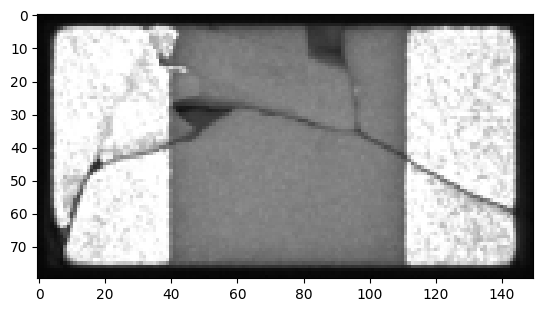

In [39]:
test_img = "/content/drive/MyDrive/Harsh/Machine Learning/Defect Detection/Test/ng/image_ng_h_1.pgm"
img = image.load_img(test_img, target_size= (80,150))
img = image.img_to_array(img)
plt.imshow(img.astype('int'))

In [40]:
img = img.reshape(1,36000)
img.shape

(1, 36000)

In [41]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 36ms/step


'ng'